## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Load

In [2]:
diabetes = load_diabetes()

## 데이터 분리

In [3]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

In [4]:
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 손실함수 정의

In [5]:
# MSE 손실 함수 정의
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## gradient 함수 / 학습률 정의

In [6]:
# 기울기 계산
def compute_gradient(X, y, W, b):
    m = X.shape[0]
    y_pred = np.dot(X, W) + b
    dW = -(2/m) * np.dot(X.T, (y - y_pred))
    db = -(2/m) * np.sum(y - y_pred)
    return dW, db

In [7]:
# 경사하강법 함수
def gradient_descent(X, y, W, b, learning_rate=0.01, epochs=1000):
    losses = []
    for epoch in range(epochs):
        dW, db = compute_gradient(X, y, W, b)
        W -= learning_rate * dW
        b -= learning_rate * db

        if epoch % 100 == 0:
            loss = mse_loss(y, np.dot(X, W) + b)
            losses.append(loss)
            print(f'Epoch {epoch}/{epochs}, Loss: {loss:.4f}')
    return W, b, losses


## 모델 학습

In [8]:
# 모델 학습
W = np.zeros(X_train.shape[1])
b = 0.0
W, b, losses = gradient_descent(X_train, y_train, W, b)

Epoch 0/1000, Loss: 28434.9238
Epoch 100/1000, Loss: 3321.2522
Epoch 200/1000, Loss: 2906.0494
Epoch 300/1000, Loss: 2896.9826
Epoch 400/1000, Loss: 2895.7336
Epoch 500/1000, Loss: 2894.7300
Epoch 600/1000, Loss: 2893.7750
Epoch 700/1000, Loss: 2892.8567
Epoch 800/1000, Loss: 2891.9728
Epoch 900/1000, Loss: 2891.1216


In [9]:
# 결과 출력
print("\nFinal Weights:", W)
print("Final Bias:", b)


Final Weights: [  1.93719513 -11.43256983  26.26716359  16.60709889  -9.87977935
  -2.30410055  -7.68367529   8.20106609  21.95087936   2.60273306]
Final Bias: 153.7365436506149


## test 데이터에 대한 성능 평가

In [10]:
# 테스트 데이터 평가
y_test_pred = np.dot(X_test, W) + b
test_loss = mse_loss(y_test, y_test_pred)
print("\nTest Loss (MSE):", test_loss)


Test Loss (MSE): 2885.6135403538306


## 시각화

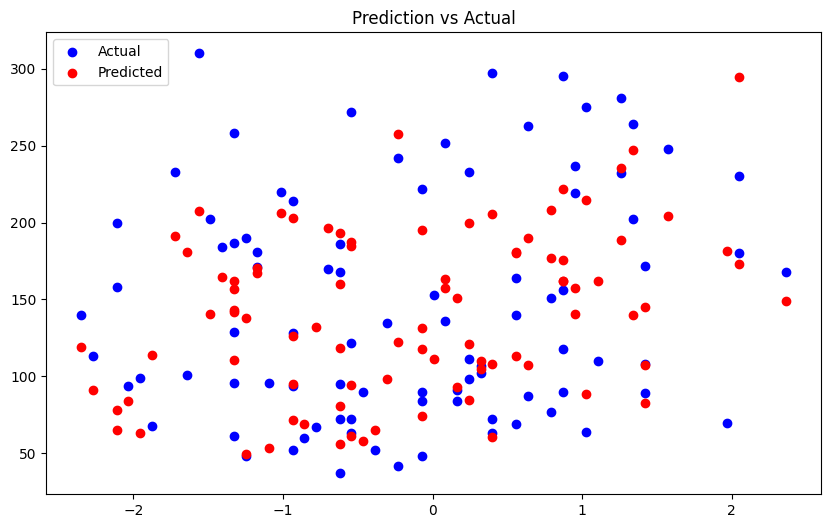

In [11]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_test_pred, color='red', label='Predicted')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()